In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
plt.style.use('fivethirtyeight')

import seaborn as sns
import numpy as np
import pandas as pd

import json
import base64
import io

import warnings
warnings.filterwarnings('ignore')

import codecs
from IPython.display import HTML

In [60]:
movies = pd.read_csv('./data/tmdb_5000_movies.csv')
credits = pd.read_csv('./data/tmdb_5000_credits.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [61]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [62]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [63]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


Convert JSON into str

In [64]:
# Change genres column: JSON to str
movies['genres'] = movies['genres'].apply(json.loads)
for index, i in zip(movies.index, movies['genres']):
    genre_arr = []
    for j in range(len(i)):
        genre_arr.append((i[j]['name']))
    movies.loc[index, 'genres'] = str(genre_arr)
print(movies['genres'])


0       ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                      ['Adventure', 'Fantasy', 'Action']
2                        ['Action', 'Adventure', 'Crime']
3                ['Action', 'Crime', 'Drama', 'Thriller']
4              ['Action', 'Adventure', 'Science Fiction']
                              ...                        
4798                      ['Action', 'Crime', 'Thriller']
4799                                ['Comedy', 'Romance']
4800           ['Comedy', 'Drama', 'Romance', 'TV Movie']
4801                                                   []
4802                                      ['Documentary']
Name: genres, Length: 4803, dtype: object


In [65]:
# Change keywords column: JSON to str
movies['keywords'] = movies['keywords'].apply(json.loads)
for index, i in zip(movies.index, movies['keywords']):
    genre_arr = []
    for j in range(len(i)):
        genre_arr.append((i[j]['name']))
    movies.loc[index, 'keywords'] = str(genre_arr)
print(movies['keywords'])

0       ['culture clash', 'future', 'space war', 'spac...
1       ['ocean', 'drug abuse', 'exotic island', 'east...
2       ['spy', 'based on novel', 'secret agent', 'seq...
3       ['dc comics', 'crime fighter', 'terrorist', 's...
4       ['based on novel', 'mars', 'medallion', 'space...
                              ...                        
4798    ['united states–mexico barrier', 'legs', 'arms...
4799                                                   []
4800    ['date', 'love at first sight', 'narration', '...
4801                                                   []
4802    ['obsession', 'camcorder', 'crush', 'dream girl']
Name: keywords, Length: 4803, dtype: object


In [66]:
# Change production_companies column: JSON to str
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index, i in zip(movies.index, movies['production_companies']):
    genre_arr = []
    for j in range(len(i)):
        genre_arr.append((i[j]['name']))
    movies.loc[index, 'production_companies'] = str(genre_arr)
print(movies['production_companies'])

0       ['Ingenious Film Partners', 'Twentieth Century...
1       ['Walt Disney Pictures', 'Jerry Bruckheimer Fi...
2                  ['Columbia Pictures', 'Danjaq', 'B24']
3       ['Legendary Pictures', 'Warner Bros.', 'DC Ent...
4                                ['Walt Disney Pictures']
                              ...                        
4798                                ['Columbia Pictures']
4799                                                   []
4800    ['Front Street Pictures', 'Muse Entertainment ...
4801                                                   []
4802     ['rusty bear entertainment', 'lucky crow films']
Name: production_companies, Length: 4803, dtype: object


In [67]:
# Change cast column: JSON to str
credits['cast'] = credits['cast'].apply(json.loads)
for index, i in zip(credits.index, credits['cast']):
    genre_arr = []
    for j in range(len(i)):
        genre_arr.append((i[j]['name']))
    credits.loc[index, 'cast'] = str(genre_arr)
print(credits['cast'])

0       ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...
1       ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...
2       ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...
3       ['Christian Bale', 'Michael Caine', 'Gary Oldm...
4       ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...
                              ...                        
4798    ['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...
4799    ['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...
4800    ['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...
4801    ['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...
4802    ['Drew Barrymore', 'Brian Herzlinger', 'Corey ...
Name: cast, Length: 4803, dtype: object


In [68]:
# Change crew column: JSON to str
credits['crew'] = credits['crew'].apply(json.loads)
def find_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(find_director)
credits.rename(columns={'crew':'director'}, inplace = True)
print(credits['director'])

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object


In [69]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Merging 2 csv files

In [70]:
movies = movies.merge(credits, left_on = 'id', right_on='movie_id', how='left')
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

Working with Genres column

In [71]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ', '').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

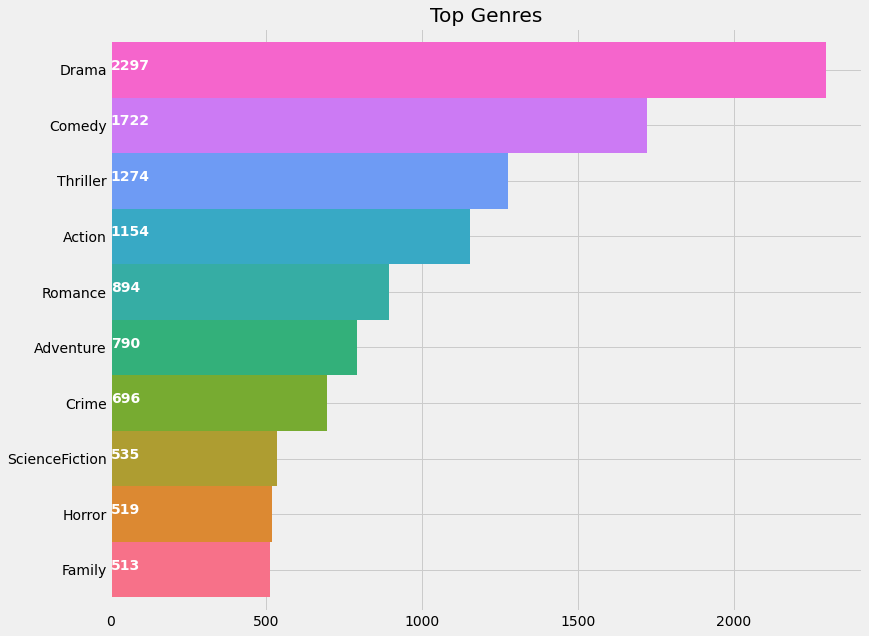

In [72]:
plt.subplots(figsize = (12, 10))
genres = []
for i in movies['genres']:
    genres.extend(i)
ax = pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=1, color=sns.color_palette('husl', 10))
for i, v in enumerate(pd.Series(genres).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize = 14, color = 'white', weight = 'bold')
plt.title('Top Genres')
plt.show()

Drama is most popular, followed by comedy.

In [73]:
for i, j in zip(movies['genres'], movies.index):
    lst = []
    lst = i
    lst.sort()
    movies.loc[j, 'genres'] = str(lst)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [74]:
genre_list =[]
for index, row in movies.iterrows():
    genres = row['genres']
    for genre in genres:
        if genre not in genre_list:
            genre_list.append(genre)
genre_list[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

One-Hot Encoding 

In [75]:
def binary(genre_arr):
    binary_list = []
    for genre in genre_list:
        if genre in genre_arr:
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [76]:
movies['genre_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genre_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genre_bin, dtype: object

Working with Cast Column

In [77]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ', '').str.replace("'", '').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

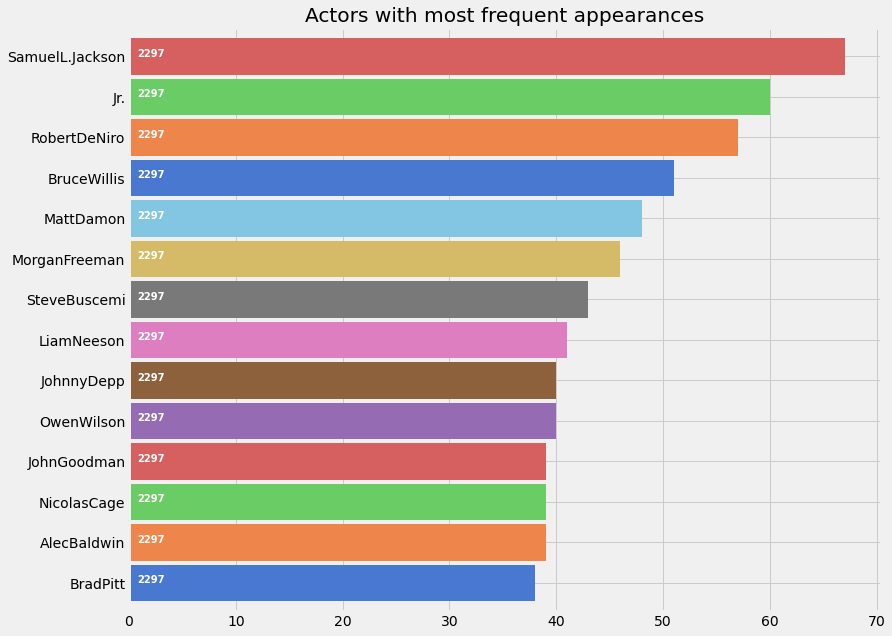

In [96]:
plt.subplots(figsize = (12, 10))
freq_actors = []
for i in movies['cast']:
    freq_actors.extend(i)
# for i in range(len(freq_actors)):
#     if freq_actors[i] == 0:
#         del freq_actors[i]
freq_pd = pd.Series(freq_actors).value_counts()[:15]
freq_pd.drop(labels='',inplace=True)
freq_pd.drop(labels='Jr.',inplace=True)
# print(freq_pd[freq_pd==44].index)
ax = freq_pd.sort_values(ascending=True).plot.barh(width = .9, color = sns.color_palette('muted', 40))
for i, j in enumerate(freq_pd.sort_values(ascending=True).values):
    ax.text(.8, i, v, fontsize =10, color = 'white', weight='bold')
plt.title('Actors with most frequent appearances')
plt.show()

In [21]:
for i, j in zip(movies['cast'], movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j, 'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i, j in zip(movies['cast'], movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j, 'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ', '').str.replace("'", '')

In [22]:
castList = []
for index, row in movies.iterrows():
    cast = row['cast']
    for i in cast:
        if i not in castList:
            castList.append(i)

In [23]:
def binary(cast_list):
    binary_list = []
    for genre in castList:
        if genre in cast_list:
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [24]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

Director Column

In [25]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

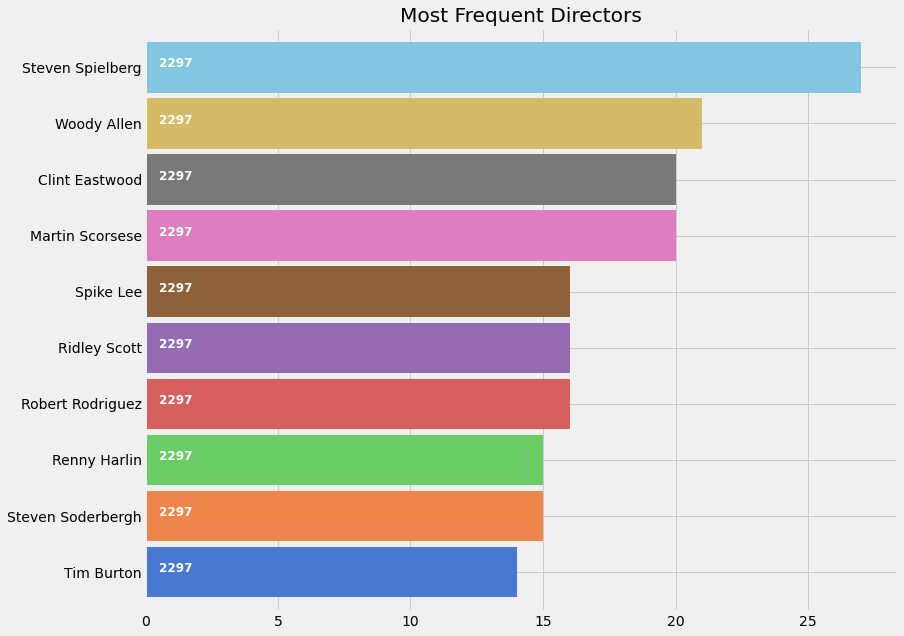

In [26]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director'] != ''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=.9, color=sns.color_palette('muted',40))
for i, j in enumerate(movies[movies['director'] != ''].director.value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.5, i, v, fontsize=12, color='white',weight='bold')
plt.title('Most Frequent Directors')
plt.show()

In [27]:
directorList = []
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [28]:
def binary(director_list):
    binary_list = []
    for director in directorList:
        if director in director_list:
            binary_list.append(1)
        else:            
            binary_list.append(0)
    return binary_list

In [29]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genre_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Keywords Column

In [31]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keyywords'] = movies['keywords'].str.split(',')
for i, j in zip(movies['keywords'], movies.index):
    list2 = []
    list2 = movies.loc[j, 'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i, j in zip(movies['keywords'], movies.index):
    list2 = [] 
    list2 = i
    list2.sort()
    movies.loc[j, 'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [32]:
words_list = []
for index, row in movies.iterrows():
    genres = row['keywords']
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [33]:
def binary(words):
    binary_list = []
    for genre in words_list:
        if genre in words:
            binary_list.append(1)
        else:
            binary_list.append(0)
    return binary_list

In [34]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)]
movies = movies[movies['director'] != '']

# Similarity between movies
Use Cosine similarity

In [37]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    # print(a)
    
    genresA = a['genre_bin']
    genresB = b['genre_bin']
    # print(genresA)
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance


In [38]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import jaccard
def Jac(A,B):
    A = set(A)
    B = set(B)
    numerator = A.symmetric_difference(B)
    denominator = A.union(B)
    return len(numerator)/len(denominator)

def Jac_Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    # print(a)

    genresA = a['genre_bin']
    genresB = b['genre_bin']
    genreDistance = jaccard(genresA, genresB)
    # genreDistance = jaccard_score(genresA, genresB)
    # genreDistance = Jac(genresA, genresB)

    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = jaccard(scoreA, scoreB)
    # scoreDistance = jaccard_score(scoreA, scoreB)
    # scoreDistance = Jac(scoreA, scoreB)

    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = jaccard(directA, directB)
    # directDistance = jaccard_score(directA, directB)
    # directDistance = Jac(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = jaccard(wordsA, wordsB)
    # wordsDistance = jaccard_score(wordsA, wordsB)
    # wordsDistance = Jac(wordsA, wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [39]:
print(Similarity(3, 150))
print(Jac_Similarity(3, 150))

1.6590909090909092
2.1044546850998462


In [40]:
print(movies.iloc[3])
print(movies.iloc[150])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              AnneHathaway,ChristianBale,GaryOldman,MichaelC...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords                                                         []
genre_bin         [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
keyywords         [dccomics, crimefighter, terrorist, secretiden...
words_bin                                                       [1]
Name: 3, dtype: object
id                                                              608
original_title                                      Men in Black II
genres                  [

Cosine similarity is about 2.75 for movies The Dark Knight Rises and Men in Black II, which is pretty high. The larger the distance, the less similar the movies are. This makes sense because Dark Knight Rises is a more serious superhero movie, whereas Men in Black II is a comedy. However, both involve crime-fighting so it is surprised the cosine similarity is so high.

In [41]:
new_id = list(range(0, movies.shape[0]))
movies['new_id'] = new_id
movies = movies[['original_title','genres','vote_average','genre_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genre_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]


Predict Score

In [42]:
import operator

def predict_score(name):
    with open('./data/'+name.replace(" ","")+'.txt', 'a') as f:
        new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
        
        print('Selected Movie: ', new_movie.original_title.values[0], file = f)
        def getNeighbors(baseMovie, K):
            distances = []
            for _, movie in movies.iterrows():
                if movie['new_id'] != baseMovie['new_id'].values[0]:
                    dist = Similarity(baseMovie['new_id'].values[0],movie['new_id'])
                    distances.append((movie['new_id'],dist))
            distances.sort(key=operator.itemgetter(1))
            neighbors=[]
            for x in range(K):
                neighbors.append(distances[x])
            return neighbors
        K = 10
        avg_rating = 0
        neighbors = getNeighbors(new_movie, K)

        print('\nRecommended Movies: \n', file = f)
        for neighbor in neighbors:
            avg_rating = avg_rating+movies.iloc[neighbor[0]][2]
            print(movies.iloc[neighbor[0]][0] + " | Genres: " + str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+ str(movies.iloc[neighbor[0]][2]), file = f)
            avg_rating = avg_rating/K
            print('Cos Predicted rating for %s is: %f' %(new_movie['original_title'].values[0], avg_rating), file = f)
            print('Cos Actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']), file = f)
        f.close()

In [43]:
def predict_score_jac(name):
    with open('./data/'+name.replace(" ","")+'.txt', 'a') as f:
        new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
        
        print('Selected Movie: ', new_movie.original_title.values[0], file = f)
        def getNeighbors(baseMovie, K):
            distances = []
            for _, movie in movies.iterrows():
                if movie['new_id'] != baseMovie['new_id'].values[0]:
                    dist = Jac_Similarity(baseMovie['new_id'].values[0],movie['new_id'])
                    distances.append((movie['new_id'],dist))
            distances.sort(key=operator.itemgetter(1))
            neighbors=[]
            for x in range(K):
                neighbors.append(distances[x])
            return neighbors
        K = 10
        avg_rating = 0
        neighbors = getNeighbors(new_movie, K)
        print(neighbors)

        print('\nRecommended Movies: \n', file = f)
        for neighbor in neighbors:
            avg_rating = avg_rating+movies.iloc[neighbor[0]][2]
            print(movies.iloc[neighbor[0]][0] + " | Genres: " + str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+ str(movies.iloc[neighbor[0]][2]), file = f)
            avg_rating = avg_rating/K
            print('Jac Predicted rating for %s is: %f' %(new_movie['original_title'].values[0], avg_rating), file = f)
            print('Jac Actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']), file = f)
        f.close()

In [44]:
predict_score('Godfather')
predict_score_jac('Godfather')

[(1209, 0.5714285714285714), (2730, 0.7948717948717949), (3336, 0.8160919540229885), (3011, 0.8333333333333333), (4292, 0.9743589743589743), (4191, 1.0333333333333332), (1018, 1.0444444444444443), (2544, 1.074074074074074), (3681, 1.0804597701149425), (970, 1.0952380952380951)]


In [45]:
predict_score('Despicable Me')
predict_score_jac('Despicable Me')

[(614, 0.717948717948718), (231, 1.0595238095238095), (496, 1.0666666666666667), (429, 1.074074074074074), (464, 1.1111111111111112), (481, 1.1149425287356323), (896, 1.130952380952381), (558, 1.1333333333333333), (692, 1.1494252873563218), (3579, 1.150537634408602)]


In [46]:
predict_score('Harry Potter and the Half-Blood Prince')
predict_score_jac('Harry Potter and the Half-Blood Prince')

[(113, 0.4423076923076923), (114, 0.75), (191, 0.8266666666666667), (197, 0.8266666666666667), (276, 0.8266666666666667), (37, 1.130952380952381), (781, 1.1494252873563218), (368, 1.182795698924731), (1074, 1.182795698924731), (143, 1.1979166666666665)]


In [47]:
predict_score('The Lord of the Rings: The Fellowship of the Ring')
predict_score_jac('The Lord of the Rings: The Fellowship of the Ring')

[(329, 0.3793103448275862), (330, 0.3793103448275862), (19, 0.4074074074074074), (98, 0.5), (22, 0.7407407407407407), (24, 0.9482758620689655), (2654, 1.1), (208, 1.1494252873563218), (715, 1.1666666666666665), (746, 1.1666666666666665)]


In [48]:
predict_score('Pulp Fiction')
predict_score_jac('Pulp Fiction')

[(4276, 0.53125), (830, 0.8333333333333333), (3302, 1.1041666666666665), (684, 1.110344827586207), (1680, 1.118279569892473), (669, 1.121212121212121), (2821, 1.1370967741935485), (828, 1.150537634408602), (2586, 1.150537634408602), (3399, 1.150537634408602)]


In [49]:
predict_score("Mulan")
predict_score_jac("Mulan")

[(141, 1.086021505376344), (3128, 1.1333333333333333), (2115, 1.1354166666666665), (1949, 1.1515151515151514), (769, 1.1666666666666665), (734, 1.1809523809523808), (1426, 1.1809523809523808), (144, 1.182795698924731), (54, 1.196078431372549), (2804, 1.196078431372549)]


In [50]:
predict_score('Memoirs of a Geisha')
predict_score_jac('Memoirs of a Geisha')

[(482, 1.1363636363636362), (536, 1.2), (3919, 1.2473118279569892), (380, 1.2528735632183907), (3228, 1.2528735632183907), (4051, 1.2528735632183907), (2909, 1.2738095238095237), (853, 1.2916666666666665), (1762, 1.2916666666666665), (1648, 1.2999999999999998)]


In [51]:
predict_score('The Hangover')
predict_score_jac('The Hangover')

[(1356, 0.0), (1965, 0.5), (3944, 0.9333333333333333), (1130, 0.9425287356321839), (1777, 0.9523809523809523), (641, 0.9571428571428571), (3173, 0.9666666666666666), (2456, 0.96875), (829, 0.9770114942528736), (1197, 0.9770114942528736)]


In [52]:
predict_score('Days of Summer')
predict_score_jac('Days of Summer')

[(3529, 0.9247311827956989), (3257, 1.021505376344086), (1831, 1.0333333333333332), (1190, 1.0416666666666665), (2355, 1.0416666666666665), (3261, 1.0416666666666665), (1329, 1.049019607843137), (3185, 1.053763440860215), (4537, 1.0606060606060606), (2172, 1.0729166666666665)]


In [53]:
predict_score('Mean Girls')
predict_score_jac('Mean Girls')

[(1777, 0.37037037037037035), (835, 0.9074074074074074), (3577, 0.9358974358974359), (2558, 0.9583333333333333), (155, 0.9629629629629629), (1878, 0.9629629629629629), (1886, 0.9743589743589743), (2847, 0.9743589743589743), (2138, 0.9866666666666666), (1184, 1.0)]


In [54]:
predict_score('Good Will Hunting')
predict_score_jac('Good Will Hunting')

[(2619, 0.41379310344827586), (1112, 0.5882352941176471), (1424, 0.9333333333333333), (2382, 1.0), (2916, 1.0114942528735633), (2026, 1.0238095238095237), (2713, 1.0333333333333332), (4345, 1.0333333333333332), (1546, 1.0416666666666665), (2482, 1.0416666666666665)]


In [55]:
predict_score('Walking With Dinosaurs')
predict_score_jac('Walking With Dinosaurs')

[(406, 1.0193548387096774), (399, 1.0238095238095237), (1855, 1.1111111111111112), (2804, 1.118279569892473), (144, 1.1494252873563218), (3128, 1.1494252873563218), (141, 1.150537634408602), (1426, 1.1515151515151514), (1949, 1.1666666666666665), (2652, 1.1666666666666665)]


In [56]:
predict_score('Fight Club')
predict_score_jac('Fight Club')

[(1161, 0.5862068965517241), (2130, 1.1111111111111112), (3109, 1.1282051282051282), (824, 1.1466666666666665), (1656, 1.1481481481481481), (2081, 1.1481481481481481), (3789, 1.1481481481481481), (4715, 1.1481481481481481), (1240, 1.1666666666666665), (1455, 1.1666666666666665)]


In [57]:
predict_score("The Pianist")
predict_score_jac("The Pianist")

[(2661, 0.9333333333333333), (557, 1.0), (1094, 1.0114942528735633), (585, 1.0333333333333332), (3151, 1.0333333333333332), (2797, 1.0606060606060606), (1524, 1.1), (642, 1.1041666666666665), (1922, 1.107843137254902), (2900, 1.118279569892473)]
